In [1]:
# Deep Learning Jump Start
# 
# Music Genre Classifier 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os, json, math, librosa

import IPython.display as ipd
import librosa.display

import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D

import sklearn.model_selection as sk

from sklearn.model_selection import train_test_split


In [3]:
%ls

__notebook_source__.ipynb


In [4]:
# Getting Genres from folder name

MUSIC = '../input/gtzan-dataset-music-genre-classification/Data/genres_original/'
music_dataset = [] # File locations for each wav file 
genre_target = [] # 
for root, dirs, files in os.walk(MUSIC):
    for name in files:
        filename = os.path.join(root, name)
        if filename != '/data/genres_original/jazz/jazz.00054.wav':
            music_dataset.append(filename)
            genre_target.append(filename.split("/")[5])
            

In [5]:
# Displaying genres 

print(set(genre_target))

{'reggae', 'classical', 'disco', 'pop', 'jazz', 'blues', 'hiphop', 'metal', 'country', 'rock'}


In [6]:
# Testing Audio Files

audio_path = music_dataset[500]
# img_path = './data/images_original/blues/blues00011.png'

x , sr = librosa.load(audio_path)



librosa.load(audio_path, sr=None)

ipd.Audio(audio_path)



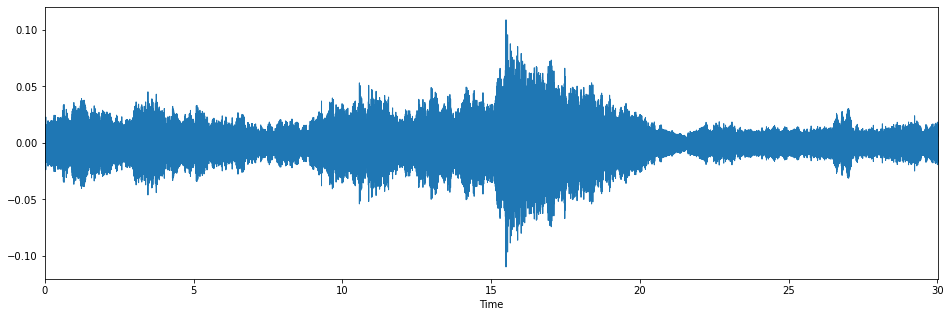

In [7]:
# Visualizing Audio File as a waveform
plt.figure(figsize=(16, 5))
librosa.display.waveplot(x, sr=sr)

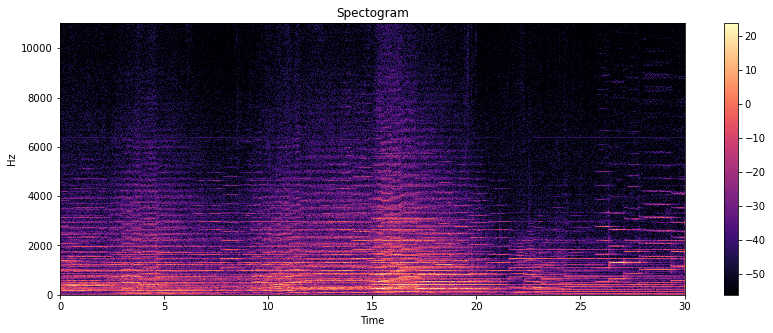

In [8]:
# Visualizing audio file as a spectogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.title('Spectogram')
plt.colorbar()



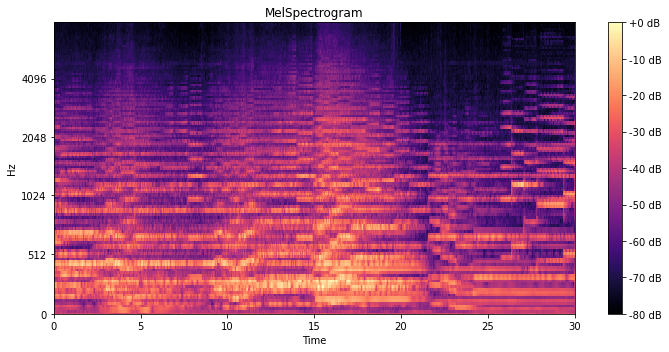

In [9]:
# Visualizing Audio as Mel-Spectogram

file_location = audio_path
y, sr = librosa.load(file_location)
melSpec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
melSpec_dB = librosa.power_to_db(melSpec, ref=np.max)
plt.figure(figsize=(10, 5))
librosa.display.specshow(melSpec_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+1.0f dB')
plt.title("MelSpectrogram")
plt.tight_layout()
plt.show()


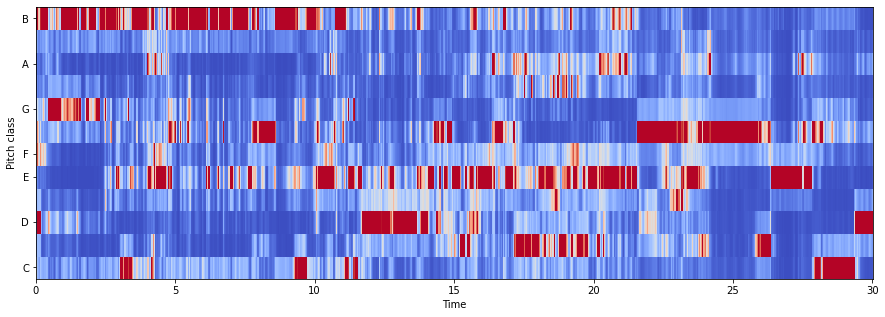

In [10]:
chromagram = librosa.feature.chroma_stft(x, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')

In [11]:
DATASET_PATH = '../input/gtzan-dataset-music-genre-classification/Data/genres_original/'
JSON_PATH = "data_10.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION


def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=20):
    """Extracts MFCCs from music dataset and saves them into a json file along witgh genre labels.
        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save MFCCs
        :param num_mfcc (int): Number of coefficients to extract
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :param hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        :return:
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

		# load audio file

                file_path = os.path.join(dirpath, f)
            
                if file_path != '../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00054.wav':

                    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
                
                
                    # process all segments of audio file
                    for d in range(num_segments):

                        # calculate start and finish sample for current segment
                        start = samples_per_segment * d
                        finish = start + samples_per_segment

                        # extract mfcc
                        mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                        mfcc = mfcc.T

                        # store only mfcc feature with expected number of vectors
                        if len(mfcc) == num_mfcc_vectors_per_segment:
                            data["mfcc"].append(mfcc.tolist())
                            data["labels"].append(i-1)
                            print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [12]:
# Runs Data Processing     
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=20)


Processing: disco
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00031.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00031.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00031.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00031.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00031.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00031.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00031.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00031.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00031.wav, segment:9
../input/gtzan-dataset-music-genre-classifica

../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00060.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00060.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00060.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00060.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00060.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00060.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00060.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00060.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00060.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_or

../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00075.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00075.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00075.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00075.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00075.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00075.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00075.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00075.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00066.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/g

../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00078.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00098.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00098.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00098.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00098.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00098.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00098.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00098.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00098.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_o

../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00074.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00074.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00074.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00074.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00074.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00074.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00074.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00074.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00017.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/g

../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00047.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00047.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00047.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00047.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00047.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00047.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00047.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00047.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00047.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/gen

../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00073.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00073.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00073.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00073.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00073.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00073.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00073.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00073.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00073.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/

../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00037.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00037.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00037.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00037.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00037.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00037.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00037.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00037.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00037.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_or

../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00083.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00083.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00083.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00083.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00083.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00021.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00021.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00021.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00021.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genr

../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00052.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00052.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00052.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00052.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00052.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00052.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00052.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00052.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00052.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_or

../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00069.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00069.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00069.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00069.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00069.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00069.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00069.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00069.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00032.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/g

../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00059.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00059.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00059.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00059.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00059.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00059.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00059.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00059.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00059.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_or

../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00019.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00019.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00019.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00019.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00019.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00019.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00019.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00019.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00019.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_o

../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00061.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00061.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00061.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00061.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00061.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00061.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00061.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00061.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00061.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/

../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00099.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00099.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00056.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00056.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00056.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00056.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00056.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00056.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00056.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_

../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00046.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00046.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00046.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00046.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00046.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00046.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00046.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00046.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00046.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genr

../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00011.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00011.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00011.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00011.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00011.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00011.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00011.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00011.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00011.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_or

../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00081.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00081.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00081.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00081.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00081.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00081.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00081.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00081.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00081.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/

../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00018.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00018.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00018.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00018.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00018.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00018.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00018.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00018.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00018.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genre

../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00008.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00008.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00008.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00043.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00043.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00043.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00043.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00043.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00043.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres

../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00062.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00062.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00062.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00062.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00062.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00062.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00062.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00062.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00062.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres

../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00076.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00076.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00076.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00076.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00076.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00076.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00076.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00076.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00076.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/

../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00095.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00095.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00095.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00095.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00095.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00095.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00091.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00091.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00091.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/gen

../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00026.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00026.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00026.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00026.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00026.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00026.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00026.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00026.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00026.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_or

../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00058.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00058.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00058.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00058.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00058.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00058.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00058.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00058.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00058.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres

../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00059.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00059.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00059.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00059.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00059.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00059.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00059.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00059.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00083.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/g

../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00074.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00041.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00041.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00041.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00041.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00041.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00041.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00041.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00041.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_o

../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00005.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00005.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00005.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00005.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00005.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00005.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00005.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00005.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00005.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/gen

../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00016.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00016.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00016.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00016.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00016.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00016.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00016.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00016.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00016.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_or

../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00072.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00072.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00072.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00072.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00072.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00072.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00072.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00020.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00020.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/ge

../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00094.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00094.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00094.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00094.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00094.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00094.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00094.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00094.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00094.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_

../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00019.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00019.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00019.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00019.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00019.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00019.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00019.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00019.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00019.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/gen

../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00066.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00066.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00066.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00066.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00066.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00066.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00066.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00066.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00066.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_or

../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00095.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00095.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00095.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00095.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00097.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00097.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00097.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00097.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00097.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genre

../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00067.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00067.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00067.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00067.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00067.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00067.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00067.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00067.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00067.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/gen

../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00064.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00064.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00064.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00064.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00064.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00064.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00064.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00064.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00064.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_or

../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00088.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00088.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00088.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00088.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00088.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00088.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00088.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00088.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00088.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/gen

../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00050.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00050.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00050.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00050.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00050.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00050.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00050.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00050.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00050.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_or

../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00049.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00049.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00049.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00049.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00049.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00049.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00049.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00049.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00038.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/g

../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00012.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00012.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00012.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00012.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00012.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00012.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00012.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00012.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00012.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genre

../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00060.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00060.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00060.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00060.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00060.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00060.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00060.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00060.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00060.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genr

../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00091.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00091.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00091.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00091.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00091.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00091.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00091.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00043.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00043.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/ge

../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00073.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00073.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00073.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00073.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00073.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00073.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00073.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00073.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00073.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_or

../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00055.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00055.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00055.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00055.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00008.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00008.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00008.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00008.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00008.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genre

../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00030.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00030.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00030.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00030.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00030.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00030.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00030.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00030.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00030.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genre

../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00002.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00049.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00049.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00049.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00049.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00049.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00049.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00049.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00049.wav, segment:8
../input/gtzan-dataset-music-genre-classifica

../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00042.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00042.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00042.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00042.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00042.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00042.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00042.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00042.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00042.wav, segment:12
../input/gtzan-dataset-music-genre-classifi

../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00036.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00036.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00036.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00036.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00036.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00018.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00018.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00018.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00018.wav, segment:4
../input/gtzan-dataset-music-genre-classi

../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00011.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00011.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00011.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00011.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00011.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00011.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00011.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00011.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00011.wav, segment:16
../input/gtzan-dataset-music-genre-clas

../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00024.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00024.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00024.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00024.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00024.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00024.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00024.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00024.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00024.wav, segment:17
../input/gtzan-dataset-music-genre-cla

../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00047.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00054.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00054.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00054.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00054.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00054.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00054.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00054.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00054.wav, segment:8
../input/gtzan-dataset-music-genre-classifica

../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00060.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00060.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00060.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00060.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00060.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00060.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00060.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00060.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00060.wav, segment:9
../input/gtzan-dataset-music-genre-classificat

../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00045.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00045.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00045.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00045.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00045.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00045.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00045.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00045.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00045.wav, segment:16
../input/gtzan-dataset-music-genre-clas

../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00094.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00094.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00094.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00094.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00026.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00026.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00026.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00026.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00026.wav, segment:5
../input/gtzan-dataset-music-genre-classif

../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00032.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00032.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00032.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00032.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00032.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00032.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00032.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00032.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00032.wav, segment:9
../input/gtzan-dataset-music-genre-classificat

../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00019.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00019.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00019.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00019.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00019.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00019.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00019.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00019.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00019.wav, segment:18
../input/gtzan-dataset-music-genre-cl

../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00087.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00087.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00087.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00008.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00008.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00008.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00008.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00008.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00008.wav, segment:6
../input/gtzan-dataset-music-genre-classifi

../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00033.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00033.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00033.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00033.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00033.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00033.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00033.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00033.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00033.wav, segment:9
../input/gtzan-dataset-music-genre-classificat

../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00052.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00052.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00052.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00052.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00052.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00052.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00052.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00052.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00052.wav, segment:19
../input/gtzan-dataset-music-genre-cl

../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00088.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00088.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00085.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00085.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00085.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00085.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00085.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00085.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00085.wav, segment:7
../input/gtzan-dataset-music-genre-classific

../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00095.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00095.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00095.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00095.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00095.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00095.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00095.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00095.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00095.wav, segment:17
../input/gtzan-dataset-music-genre-cla

../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00073.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00073.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00073.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00073.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00073.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00073.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00073.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00073.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00073.wav, segment:9
../input/gtzan-dataset-music-genre-classificat

../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00098.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00098.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00098.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00035.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00035.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00035.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00035.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00035.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00035.wav, segment:6
../input/gtzan-dataset-music-genre-classifi

../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00041.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00041.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00041.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00041.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00041.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00041.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00041.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00041.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00041.wav, segment:19
../input/gtzan-dataset-music-genre-cl

../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00067.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00067.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00067.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00067.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00067.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00067.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00067.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00067.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00067.wav, segment:14
../input/gtzan-dataset-music-genre-classi

../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00065.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00065.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00065.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00065.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00065.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00065.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00065.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00065.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00065.wav, segment:20
../input/gtzan-dataset-music-genre-cl

../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00090.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00090.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00090.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00090.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00090.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00090.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00090.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00090.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00090.wav, segment:12
../input/gtzan-dataset-music-genre-classifi

../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00001.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00001.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00001.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00001.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00001.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00001.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00001.wav, segment:20

Processing: blues
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00039.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00039.wav, segment:2
../input/gtzan-dataset-m

../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00028.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00028.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00028.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00028.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00028.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00028.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00028.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00028.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00028.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/ge

../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00064.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00064.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00064.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00064.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00064.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00013.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00013.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00013.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00013.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genr

../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00094.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00094.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00094.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00094.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00094.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00094.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00094.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00094.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00094.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_o

../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00069.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00069.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00069.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00069.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00069.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00069.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00015.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00015.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00015.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/gen

../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00099.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00099.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00099.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00099.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00099.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00099.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00099.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00099.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00099.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genre

../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00051.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00051.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00051.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00051.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00051.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00051.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00051.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00051.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00051.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_o

../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00019.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00019.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00019.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00019.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00019.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00019.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00019.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00019.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00019.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_or

../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00084.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00084.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00018.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00018.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00018.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00018.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00018.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00018.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00018.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_

../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00065.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00065.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00065.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00065.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00065.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00065.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00065.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00065.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00065.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_or

../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00016.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00016.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00016.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00016.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00016.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00016.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00016.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00016.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00016.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/gen

../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00022.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00022.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00022.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00022.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00022.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00022.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00022.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00022.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00022.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_or

../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00097.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00097.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00097.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00097.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00096.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00096.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00096.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00096.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00096.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genre

../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00031.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00031.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00031.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00031.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00031.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00031.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00031.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00031.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00031.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/g

../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00056.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00056.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00056.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00056.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00056.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00056.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00056.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00056.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00056.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres

../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00055.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00055.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00089.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00089.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00089.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00089.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00089.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00089.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00089.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_

../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00050.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00050.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00050.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00050.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00050.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00050.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00050.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00050.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00050.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genr

../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00001.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00001.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00001.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00001.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00001.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00046.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00046.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00046.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00046.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genr

../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00048.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00048.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00048.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00048.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00048.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00048.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00048.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00048.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00048.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/ge

../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00092.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00092.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00092.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00092.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00092.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00003.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00003.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00003.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00003.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genr

../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00000.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00000.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00000.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00000.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00000.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00000.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00000.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00000.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00000.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genre

../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00009.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00009.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00009.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00009.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00009.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00009.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00009.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00009.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00044.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/g

../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00077.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00077.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00077.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00077.wav, segment:20

Processing: rock
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00073.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00073.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00073.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00073.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00073.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Da

../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00011.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00011.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00011.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00011.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00011.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00011.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00011.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00011.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00011.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock

../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00049.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00049.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00049.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00049.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00049.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00049.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00049.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00049.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00049.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/ro

../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00033.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00033.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00047.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00047.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00047.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00047.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00047.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00047.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00047.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock

../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00097.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00097.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00097.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00097.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00097.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00097.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00097.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00097.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00097.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock

../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00019.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00019.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00019.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00019.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00019.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00019.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00019.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00064.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00064.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock

../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00035.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00035.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00035.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00035.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00035.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00035.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00035.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00035.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00035.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.0

../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00052.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00052.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00052.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00052.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00052.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00052.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00052.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00052.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00096.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/roc

../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00043.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00043.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00043.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00043.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00043.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00043.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00043.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00043.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00043.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/ro

../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00091.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00091.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00091.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00091.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00091.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00091.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00091.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00091.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00091.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/roc

../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00023.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00023.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00023.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00023.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00044.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00044.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00044.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00044.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00044.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/ro

../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00082.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00082.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00082.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00082.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00082.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00082.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00072.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00072.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00072.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/

../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00087.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00087.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00087.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00087.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00087.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00087.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00087.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00087.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00087.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/r

../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00003.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00003.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00003.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00003.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00003.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00003.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00003.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00003.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00003.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/roc

../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00060.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00060.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00060.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00060.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00060.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00031.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00031.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00031.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00031.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/r

../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00012.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00012.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00012.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00012.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00012.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00012.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00012.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00012.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00012.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/ro

../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00068.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00068.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00068.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00068.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00068.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00068.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00068.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00053.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00053.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock

../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00046.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00046.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00046.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00046.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00046.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00046.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00046.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00046.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00046.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.0

../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00034.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00034.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00034.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00034.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00034.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00034.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00034.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00095.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00095.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock

../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00027.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00027.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00027.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00027.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00027.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00027.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00027.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00027.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00027.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.

../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00063.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00063.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00063.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00063.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00063.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00063.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00063.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00063.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00063.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/ro

../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00088.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00088.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00088.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00088.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00088.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00088.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00088.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00088.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00088.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/ro

../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00042.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00042.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00042.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00042.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00042.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00042.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00042.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00042.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00042.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.0

../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00031.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00031.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00031.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00031.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00031.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00095.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00095.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00095.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00095.wa

../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00088.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00088.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00088.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00088.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00088.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00088.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00088.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00088.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00088.wav, se

../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00069.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00069.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00069.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00069.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00069.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00069.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00069.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00069.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00069.

../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00061.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00061.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00061.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00061.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00061.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00061.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00061.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00061.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00061

../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00066.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00066.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00066.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00066.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00066.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00066.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00066.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00066.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00066.wav, se

../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00085.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00085.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00085.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00085.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00085.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00085.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00085.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00085.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00085.wa

../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00081.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00081.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00081.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00081.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00079.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00079.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00079.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00079.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00079.wav

../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00032.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00032.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00032.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00042.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00042.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00042.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00042.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00042.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00042.wav,

../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00099.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00099.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00099.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00099.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00099.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00099.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00099.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00099.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00099.wav

../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00016.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00016.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00016.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00016.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00016.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00016.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00016.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00016.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00016

../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00092.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00092.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00092.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00092.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00092.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00092.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00092.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00092.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00092.

../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00034.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00034.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00034.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00034.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00034.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00034.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00034.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00034.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00034

../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00022.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00022.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00022.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00022.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00019.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00019.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00019.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00019.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00019.wav

../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00084.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00084.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00084.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00084.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00084.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00084.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00084.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00084.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00084.wav, s

../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00041.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00041.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00041.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00041.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00041.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00041.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00041.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00041.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00041.wa

../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00077.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00077.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00077.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00077.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00077.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00077.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00077.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00077.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00060

../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00086.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00086.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00086.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00086.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00086.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00086.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00086.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00086.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00086.wav, se

../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00059.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00059.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00059.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00059.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00059.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00059.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00059.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00059.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00059.wa

../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00091.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00055.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00055.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00055.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00055.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00055.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00055.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00055.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00055.wav, s

../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00074.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00074.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00074.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00074.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00074.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00074.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00074.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00074.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00074

../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00043.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00043.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00043.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00043.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00043.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00043.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00043.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00043.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00043.wav

../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00068.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00068.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00068.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00068.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00068.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00097.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00097.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00097.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00097.wa

../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00009.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00009.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00009.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00009.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00009.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00009.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00009.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00009.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00009.wav,

../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00034.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00034.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00034.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00034.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00034.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00036.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00036.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00036.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00036.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/j

../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00032.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00032.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00032.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00032.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00032.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00032.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00032.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00032.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00032.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/ja

../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00052.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00052.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00052.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00052.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00052.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00052.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00052.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00052.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00052.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.0

../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00055.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00055.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00055.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00055.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00055.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00055.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00055.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00014.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00014.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz

../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00064.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00064.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00064.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00064.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00064.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00064.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00064.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00064.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00064.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jaz

../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00041.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00041.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00041.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00041.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00041.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00041.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00041.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00041.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00041.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.0

../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00082.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00082.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00082.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00082.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00082.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00082.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00082.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00082.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00082.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/ja

../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00061.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00061.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00061.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00061.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00061.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00061.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00061.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00061.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00061.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.0

../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00033.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00033.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00033.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00033.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00033.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00033.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00004.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00004.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00004.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/

../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00023.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00023.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00023.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00023.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00023.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00023.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00023.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00023.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00023.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.0

../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00018.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00018.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00018.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00018.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00018.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00077.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00077.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00077.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00077.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/j

../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00011.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00011.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00011.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00011.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00011.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00050.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00050.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00050.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00050.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/j

../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00081.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00081.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00081.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00081.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00081.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00081.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00081.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00081.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00081.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/ja

../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00059.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00059.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00059.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00059.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00059.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00059.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00059.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00059.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00059.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.0

../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00026.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00026.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00062.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00062.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00062.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00062.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00062.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00062.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00062.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz

../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00057.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00057.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00057.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00057.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00057.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00057.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00057.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00057.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00078.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jaz

../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00071.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00071.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00071.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00071.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00071.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00071.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00071.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00071.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00071.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/

../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00021.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00021.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00021.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00090.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00090.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00090.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00090.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00090.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00090.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jaz

../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00085.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00085.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00085.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00085.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00085.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00085.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00085.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00085.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00085.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jaz

../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00075.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00075.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00075.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00075.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00075.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00075.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00075.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00075.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00075.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/ja

../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00009.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00009.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00009.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00009.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00009.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00009.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00009.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00009.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00009.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.0

../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00062.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00062.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00062.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00062.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00062.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00062.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00062.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00062.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00062.wav, segment:16
../input/gtzan-dataset-music-genre-clas

../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00041.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00041.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00041.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00041.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00041.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00041.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00041.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00041.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00041.wav, segment:9
../input/gtzan-dataset-music-genre-classificat

../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00052.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00052.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00052.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00052.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00052.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00052.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00052.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00052.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00052.wav, segment:14
../input/gtzan-dataset-music-genre-classi

../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00051.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00051.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00051.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00051.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00051.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00051.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00051.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00051.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00051.wav, segment:9
../input/gtzan-dataset-music-genre-classificat

../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00075.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00075.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00075.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00075.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00075.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00075.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00075.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00075.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00036.wav, segment:1
../input/gtzan-dataset-music-genre-cla

../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00092.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00092.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00092.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00092.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00092.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00092.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00092.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00092.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00092.wav, segment:12
../input/gtzan-dataset-music-genre-classifi

../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00039.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00039.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00073.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00073.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00073.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00073.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00073.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00073.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00073.wav, segment:7
../input/gtzan-dataset-music-genre-classific

../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00018.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00018.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00018.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00018.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00018.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00018.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00018.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00018.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00018.wav, segment:9
../input/gtzan-dataset-music-genre-classificat

../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00093.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00093.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00093.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00093.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00093.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00093.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00093.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00093.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00093.wav, segment:15
../input/gtzan-dataset-music-genre-class

../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00098.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00098.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00098.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00098.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00098.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00098.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00098.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00098.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00098.wav, segment:17
../input/gtzan-dataset-music-genre-cla

../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00023.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00023.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00023.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00023.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00066.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00066.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00066.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00066.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00066.wav, segment:5
../input/gtzan-dataset-music-genre-classif

../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00087.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00087.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00087.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00087.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00087.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00087.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00087.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00087.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00087.wav, segment:19
../input/gtzan-dataset-music-genre-cl

../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00015.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00015.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00015.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00015.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00015.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00015.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00015.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00015.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00015.wav, segment:12
../input/gtzan-dataset-music-genre-classifi

../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00064.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00064.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00064.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00064.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00064.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00064.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00064.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00082.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00082.wav, segment:2
../input/gtzan-dataset-music-genre-clas

../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00033.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00033.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00033.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00033.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00033.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00033.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00050.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00050.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00050.wav, segment:3
../input/gtzan-dataset-music-genre-class

../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00006.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00006.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00006.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00006.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00006.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00006.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00006.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00006.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00006.wav, segment:16
../input/gtzan-dataset-music-genre-clas

../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00077.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00077.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00077.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00077.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00077.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00077.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00077.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00077.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00077.wav, segment:16
../input/gtzan-dataset-music-genre-clas

../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00079.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00079.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00079.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00079.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00079.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00079.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00045.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00045.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00045.wav, segment:3
../input/gtzan-dataset-music-genre-class

../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00038.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00038.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00038.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00038.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00038.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00038.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00038.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00038.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00038.wav, segment:15
../input/gtzan-dataset-music-genre-class

../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00086.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00086.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00086.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00054.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00054.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00054.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00054.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00054.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00054.wav, segment:6
../input/gtzan-dataset-music-genre-classifi

../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00069.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00069.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00069.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00069.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00069.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00069.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00069.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00069.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00069.wav, segment:13
../input/gtzan-dataset-music-genre-classif

../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00044.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00044.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00044.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00044.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00044.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00044.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00024.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00024.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00024.wav, segment:3
../input/gtzan-dataset-music-genre-class

../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00014.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00014.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00014.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00014.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00014.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00014.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00014.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00014.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/hiphop/hiphop.00014.wav, segment:16
../input/gtzan-dataset-music-genre-clas

../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00051.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00051.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00051.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00051.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00051.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00051.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00051.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00051.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00051.wav, segment:9
../input/gtzan-dataset-music

../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00007.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00007.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00007.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00007.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00007.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00007.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00007.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00007.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00007.wav, segment:12
../input/gtzan-dataset-mu

../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00026.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00026.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00026.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00026.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00026.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00026.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00026.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00026.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00026.wav, segment:18
../input/gtzan-data

../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00057.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00057.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00057.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00057.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00057.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00057.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00057.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00057.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00033.wav, segment:1
../input/gtzan-datas

../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00022.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00022.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00022.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00004.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00004.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00004.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00004.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00004.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00004.wav, segment:6
../input/gtzan-dataset-mu

../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00068.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00068.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00068.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00068.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00068.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00068.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00068.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00068.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00068.wav, segment:9
../input/gtzan-dataset-music

../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00015.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00015.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00015.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00015.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00015.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00015.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00015.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00065.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00065.wav, segment:2
../input/gtzan-datase

../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00078.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00078.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00078.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00078.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00078.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00078.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00078.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00078.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00078.wav, segment:20
../input/gtzan-data

../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00039.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00039.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00039.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00039.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00039.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00039.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00039.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00039.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00039.wav, segment:9
../input/gtzan-dataset-music

../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00060.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00060.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00060.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00060.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00060.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00060.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00060.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00060.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00060.wav, segment:20
../input/gtzan-data

../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00088.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00088.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00003.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00003.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00003.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00003.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00003.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00003.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00003.wav, segment:7
../input/gtzan-dataset-mus

../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00019.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00012.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00012.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00012.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00012.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00012.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00012.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00012.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00012.wav, segment:8
../input/gtzan-dataset-musi

../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00013.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00013.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00013.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00013.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00013.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00013.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00013.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00013.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00013.wav, segment:13
../input/gtzan-dataset-m

../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00085.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00085.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00085.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00085.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00085.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00085.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00085.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00085.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00085.wav, segment:14
../input/gtzan-dataset-

../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00011.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00011.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00011.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00011.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00011.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00011.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00011.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00011.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00011.wav, segment:14
../input/gtzan-dataset-

../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00035.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00035.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00035.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00035.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00035.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00035.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00035.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00035.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00035.wav, segment:16
../input/gtzan-datase

../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00005.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00005.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00005.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00005.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00005.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00005.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00005.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00005.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00005.wav, segment:17
../input/gtzan-datas

../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00083.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00083.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00083.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00083.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00083.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00075.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00075.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00075.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00075.wav, segment:4
../input/gtzan-dataset-

../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00079.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00079.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00079.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00079.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00079.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00079.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00079.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00079.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00079.wav, segment:9
../input/gtzan-dataset-music

../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00069.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00069.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00069.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00069.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00069.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00069.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00069.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00069.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00069.wav, segment:12
../input/gtzan-dataset-mu

../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00048.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00048.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00048.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00048.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00048.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00048.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00048.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00048.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00047.wav, segment:1
../input/gtzan-datas

../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00016.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00016.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00016.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00016.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00016.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00016.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00016.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00016.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00016.wav, segment:9
../input/gtzan-dataset-music

../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00064.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00064.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00064.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00064.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00064.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00064.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00064.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00064.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/country/country.00064.wav, segment:14
../input/gtzan-dataset-

../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00016.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00016.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00016.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00016.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00016.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00016.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00030.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00030.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00030.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00030.wav, segm

../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00012.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00012.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00012.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00012.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00012.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00012.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00012.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00012.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00012.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00012.wav, segment:1

../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00002.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00002.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00002.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00002.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00002.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00002.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00002.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00002.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00002.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00002.wav, s

../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00092.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00092.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00092.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00092.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00092.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00092.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00092.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00042.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00042.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00042.wav, seg

../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00022.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00022.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00022.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00022.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00071.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00071.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00071.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00071.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00071.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00071.wav, segmen

../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00077.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00077.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00077.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00077.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00077.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00077.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00077.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00077.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00077.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00031.wav, s

../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00006.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00006.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00006.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00006.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00006.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00006.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00006.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00006.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00006.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00006.wav, segment:10

../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00009.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00009.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00021.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00021.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00021.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00021.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00021.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00021.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00021.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00021.wav, segment:

../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00019.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00019.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00019.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00019.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00019.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00019.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00019.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00019.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00019.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00019.wav, segme

../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00036.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00036.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00036.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00036.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00036.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00036.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00035.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00035.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00035.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00035.wav, segm

../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00066.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00066.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00066.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00066.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00066.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00066.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00066.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00066.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00066.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00066.wav, segmen

../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00046.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00046.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00046.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00046.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00046.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00046.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00046.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00046.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00046.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00081.wav, s

../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00028.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00018.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00018.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00018.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00018.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00018.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00018.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00018.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00018.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00018.wav, segment:9

../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00069.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00069.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00069.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00069.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00069.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00069.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00069.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00069.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00069.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00069.wav, segm

../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00084.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00034.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00034.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00034.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00034.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00034.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00034.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00034.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00034.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00034.wav, segment:9

../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00040.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00040.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00040.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00040.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00040.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00040.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00047.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00047.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00047.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00047.wav, segm

../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00000.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00000.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00000.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00000.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00000.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00000.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00000.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00000.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00000.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00000.wav, segmen

../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00095.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00095.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00095.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00095.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00095.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00095.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00095.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00095.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00095.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00095.wav, seg

../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00011.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00011.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00011.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00011.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00011.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00011.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00011.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00011.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00011.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00011.wav, segme

../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00005.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00005.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00005.wav, segment:3
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00005.wav, segment:4
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00005.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00005.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00005.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00005.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00005.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00005.wav, segment:10

../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00089.wav, segment:14
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00089.wav, segment:15
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00089.wav, segment:16
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00089.wav, segment:17
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00089.wav, segment:18
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00089.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00089.wav, segment:20
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00038.wav, segment:1
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00038.wav, segment:2
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00038.wav, seg

../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00064.wav, segment:5
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00064.wav, segment:6
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00064.wav, segment:7
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00064.wav, segment:8
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00064.wav, segment:9
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00064.wav, segment:10
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00064.wav, segment:11
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00064.wav, segment:12
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00064.wav, segment:13
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00064.wav, segmen

../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00032.wav, segment:19
../input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00032.wav, segment:20


In [14]:

DATA_PATH = "./data_10.json"


def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    z = np.array(data['mapping'])
    return X, y, z


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.
    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split
    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    :return z : Mappings for data
    """

    # load data
    X, y, z = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    #X_train = X_train[..., np.newaxis]
    #X_validation = X_validation[..., np.newaxis]
    #X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test, z


def build_model(input_shape):
    """Generates RNN-LSTM model
    :param input_shape (tuple): Shape of input set
    :return model: RNN model
    """

    # build network topology
    model = keras.Sequential()

    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(64))

    # dense layer
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model


def predict(model, X, y):
    """Predict a single sample using the trained model
    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)
    
    # get mappings for target and predicted label
    target = z[y]
    predicted = z[predicted_index]

    print("Target: {}, Predicted label: {}".format(target, predicted))




In [16]:
# get train, validation, test splits
X_train, X_validation, X_test, y_train, y_validation, y_test, z = prepare_datasets(0.25, 0.2)

# create network
input_shape = (X_train.shape[1], X_train.shape[2])
model = build_model(input_shape)

# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# train model
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=180)

# plot accuracy/error for training and validation
plot_history(history)

# evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 65, 64)            19968     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 57,802
Trainable params: 57,802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/180


ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:531 train_step  **
        y_pred = self(x, training=True)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:886 __call__
        self.name)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:180 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: [None, 65, 13, 1]


In [ ]:
# pick a sample to predict from the test set
X_to_predict = X_test[400]
y_to_predict = y_test[400]

# predict sample
predict(model, X_to_predict, y_to_predict)